In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из Excel-файла
file_path_1 = 'C:/Users/лепеха/OneDrive/Рабочий стол/Учеба/ETHUSD.csv'
ETH_df = pd.read_csv(file_path_1)

In [2]:
ETH_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06
...,...,...,...,...,...,...,...
2262,2021-10-16,3865.666504,3962.453125,3805.885986,3830.382080,3830.382080,1.657810e+10
2263,2021-10-17,3829.858887,3914.897949,3660.723389,3847.104492,3847.104492,1.590809e+10
2264,2021-10-18,3847.729980,3888.209229,3686.750488,3748.760254,3748.760254,1.738620e+10
2265,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ETH_df = ETH_df.dropna()

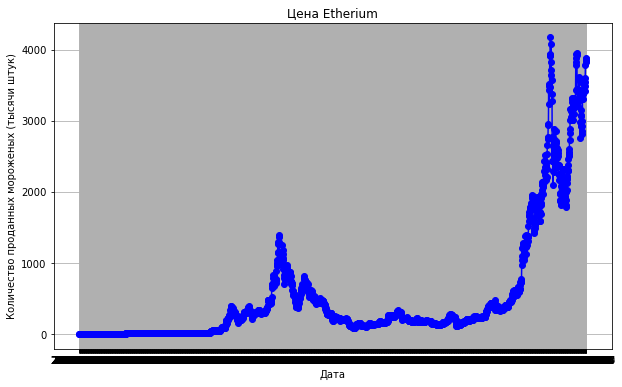

In [4]:
# Создайте график
plt.figure(figsize=(10, 6))
plt.plot(ETH_df['Date'], ETH_df['Open'], marker='o', linestyle='-', color='b')
plt.title('Цена Etherium')
plt.xlabel('Дата')
plt.ylabel('Количество проданных мороженых (тысячи штук)')
plt.grid(True)

In [9]:
import nolds
from sklearn.manifold import TSNE
import numpy as np

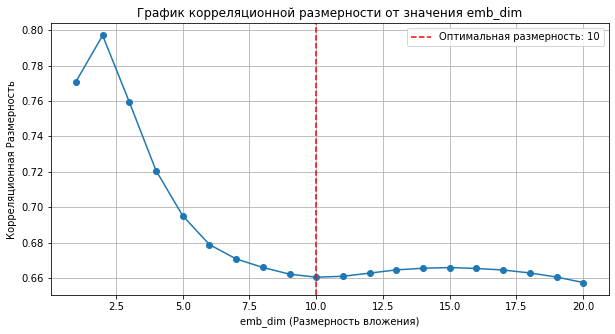

Оптимальная размерность вложения: 10


In [6]:
data = ETH_df[['Open']].to_numpy() 
min_dim = 1
max_dim = 20  
dimensions = list(range(min_dim, max_dim + 1))

# Вычисляем корреляционную размерность для разных значений emb_dim
correlation_dimensions = []
for emb_dim in dimensions:
    correlation_dimension = nolds.corr_dim(data, emb_dim=emb_dim)
    correlation_dimensions.append(correlation_dimension)

# Поиск оптимальной размерности на основе метода локтя
optimal_dimension = None
for i in range(1, len(correlation_dimensions) - 1):
    if correlation_dimensions[i] < correlation_dimensions[i - 1] and correlation_dimensions[i] < correlation_dimensions[i + 1]:
        optimal_dimension = dimensions[i]
        break

# Построим график корреляционной размерности от значения emb_dim
plt.figure(figsize=(10, 5))
plt.plot(dimensions, correlation_dimensions, marker='o', linestyle='-')
plt.title('График корреляционной размерности от значения emb_dim')
plt.xlabel('emb_dim (Размерность вложения)')
plt.ylabel('Корреляционная Размерность')
plt.grid(True)

# Выводим значение оптимальной размерности на графике
if optimal_dimension is not None:
    plt.axvline(x=optimal_dimension, color='r', linestyle='--', label=f'Оптимальная размерность: {optimal_dimension}')
    plt.legend()

plt.show()

# Выводим оптимальную размерность
if optimal_dimension is not None:
    print(f"Оптимальная размерность вложения: {optimal_dimension}")
else:
    print("Оптимальная размерность не найдена.")

In [7]:
nolds.corr_dim(ETH_df[['Open']].to_numpy(),10)

0.6604772450543356

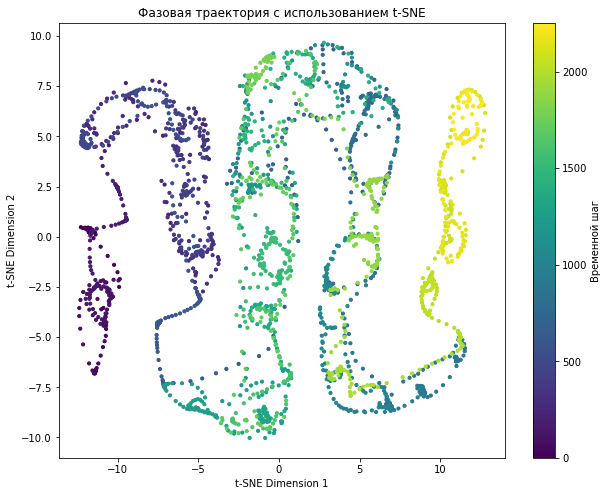

In [10]:
emb_dim = 10
embedded_data = np.array([data[i:i+emb_dim].flatten() for i in range(len(data) - emb_dim + 1)])
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
embedded_data_tsne = tsne.fit_transform(embedded_data)
plt.figure(figsize=(10, 8))
plt.scatter(embedded_data_tsne[:, 0], embedded_data_tsne[:, 1], c=range(len(embedded_data_tsne)), cmap='viridis', s=10)
plt.colorbar(label='Временной шаг')
plt.title('Фазовая траектория с использованием t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

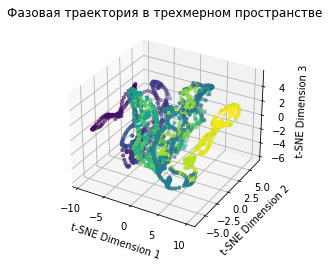

In [11]:
 
emb_dim = 10

# Создаем фазовую траекторию, встроив данные в трехмерное пространство
embedded_data = np.array([data[i:i+emb_dim].flatten() for i in range(len(data) - emb_dim + 1)])

# Применяем t-SNE для снижения размерности до 3D
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
embedded_data_tsne = tsne.fit_transform(embedded_data)

# Строим график фазовой траектории в трехмерном пространстве
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_data_tsne[:, 0], embedded_data_tsne[:, 1], embedded_data_tsne[:, 2], c=range(len(embedded_data_tsne)), cmap='viridis', s=10)
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('Фазовая траектория в трехмерном пространстве')
plt.show()